# apply_padded

## Import packages

In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import skimage
from edt import edt

ps.visualization.set_mpl_style()

## Create image and variables

/tmp/ipykernel_3411/981113644.py:2: DeprecationWarning: Call to deprecated function (or staticmethod) RSA. (This function has been renamed to rsa (lowercase to meet pep8)
  im = ps.generators.RSA(im, r=20, volume_fraction=0.4) == 0


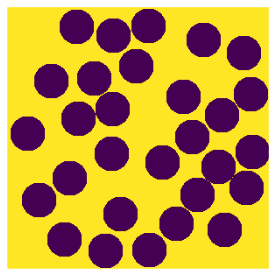

In [2]:
im = np.zeros([300, 300])
im = ps.generators.RSA(im, r=20, volume_fraction=0.4) == 0

plt.figure(figsize=[4, 4])
plt.axis(False)
plt.imshow(im);

## Apply filter function
A good use case if the application of the skeletonize_3d, which has edge artifacts that can be reduced if the image is pre-padded.
### pad_width

In [3]:
func = skimage.morphology.skeletonize_3d

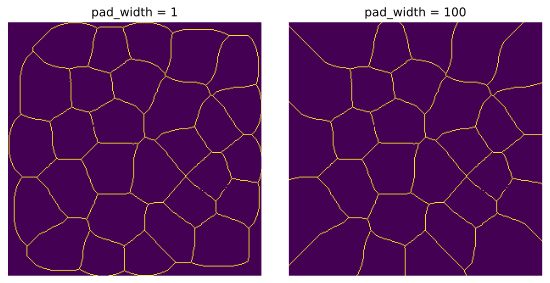

In [4]:
x = ps.filters.apply_padded(im=im, pad_width=1, func=func, pad_val=1)
xx = ps.filters.apply_padded(im=im, pad_width=100, func=func, pad_val=1)

fig, ax = plt.subplots(1, 2, figsize=[8, 4]);
ax[0].imshow(x);
ax[1].imshow(xx);
ax[0].axis(False)
ax[1].axis(False)
ax[0].set_title('pad_width = 1')
ax[1].set_title('pad_width = 100');

### func
It's also useful for morphological operations.  Note that additional keyword arguments are passed to the function.

In [5]:
func = skimage.morphology.binary_opening

/home/runner/work/porespy/porespy/porespy/filters/_funcs.py:54: FutureWarning: `selem` is a deprecated argument name for `binary_opening`. It will be removed in version 1.0. Please use `footprint` instead.
  temp = func(padded, **kwargs)


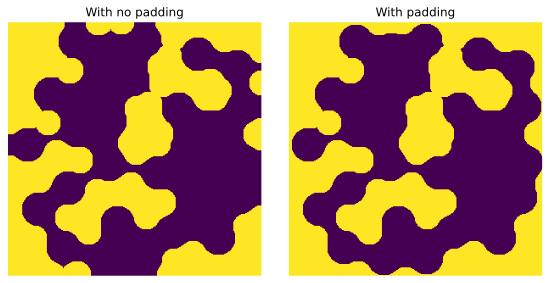

In [6]:
x = ps.filters.apply_padded(im=im, pad_width=0, func=func, pad_val=1, selem=ps.tools.ps_disk(15))
xx = ps.filters.apply_padded(im=im, pad_width=50, func=func, pad_val=1, selem=ps.tools.ps_disk(15))

fig, ax = plt.subplots(1, 2, figsize=[8, 4]);
ax[0].imshow(x)
ax[1].imshow(xx)
ax[0].axis(False)
ax[1].axis(False)
ax[0].set_title('With no padding')
ax[1].set_title('With padding');

### pad_val
The value used to pad can be specified. It is almost always desired to be 1.  Setting to 0 may be useful for applying distance transforms:

In [7]:
func = edt

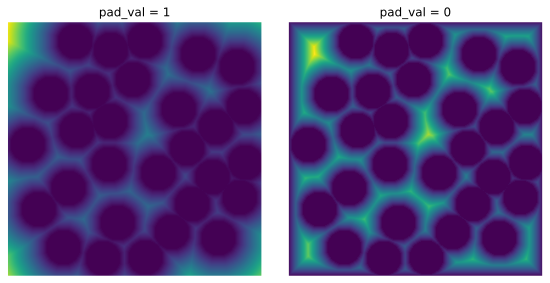

In [8]:
x = ps.filters.apply_padded(im=im, pad_width=10, func=func, pad_val=1)
xx = ps.filters.apply_padded(im=im, pad_width=10, func=func, pad_val=0)

fig, ax = plt.subplots(1, 2, figsize=[8, 4]);
ax[0].imshow(x);
ax[1].imshow(xx);
ax[0].axis(False)
ax[1].axis(False)
ax[0].set_title('pad_val = 1')
ax[1].set_title('pad_val = 0');